<a href="https://colab.research.google.com/github/sandhc1/GUVI_DS/blob/main/Pandas_Numpy/Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [3]:
d1 = pd.read_csv("college_1.csv")
d2 = pd.read_csv("college_2.csv")
print(d1.shape)
print(d2.shape)

(84, 7)
(35, 9)


In [6]:
d1.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [7]:
d2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [10]:
data= pd.concat([d1,d2],axis=0,ignore_index=True)
print(data.shape)
print(data.head())

(119, 9)
          Name  python  mysql  Previous Geekions  CodeKata Score  \
0    A.Dharani    82.0   20.0              24500           24500   
1  V.JEEVITHA     82.0   20.0              21740           21740   
2  HEMAVATHI.R   100.0  100.0              19680           19680   
3  Mugunthan S   100.0   47.0              10610           10610   
4  Sathammai.S   100.0    8.0               8980            8980   

                         Department  Rising  python_en  computational_thinking  
0  Computer Science and Engineering       0        NaN                     NaN  
1  Computer Science and Engineering       0        NaN                     NaN  
2  Computer Science and Engineering       0        NaN                     NaN  
3  Computer Science and Engineering       0        NaN                     NaN  
4  Computer Science and Engineering       0        NaN                     NaN  


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [14]:
df1 = data[data['CodeKata Score'] > 15000]
df1.to_csv("Exceeded_Expectations.csv")

In [19]:
df2 = data[(data['CodeKata Score']>10000) & (data['CodeKata Score']<15000)]
df2.to_csv("Reached_expectations.csv")

In [20]:
df3 = data[(data['CodeKata Score']>7000) & (data['CodeKata Score']<10000)]
df3.to_csv("Needs_Improvement.csv")

In [21]:
df4 = data[data['CodeKata Score']<7000]
df4.to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [23]:
data[['Previous Geekions','CodeKata Score']].agg('mean')

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [26]:
data['Name'].agg('count')

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [32]:
data[(data['python']==100.0) | (data['mysql']==100.0) | (data['python_en']==100.0) | (data['computational_thinking']==100.0)][['python','mysql','python_en','computational_thinking']].mean()

python                    91.086957
mysql                     37.255435
python_en                 44.600000
computational_thinking     1.400000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [33]:
data.nlargest(3,'Rising')

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [34]:
data.nlargest(3,'CodeKata Score')

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

Department
Computer Science and Engineering             320025
Electronics and Communication Engineering    108335
Electronics and Electrical Engineering        53800
Name: CodeKata Score, dtype: int64


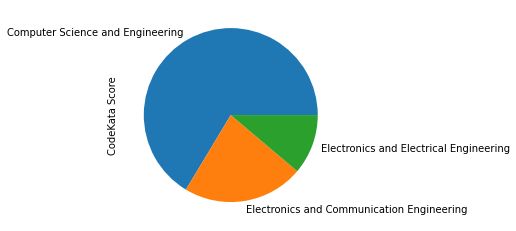

In [47]:
d = data.groupby('Department')['CodeKata Score'].agg('sum')
print(d)
d.plot(kind='pie')


###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

                                           CodeKata Score            Name
Department                                                               
Computer Science and Engineering                    24500     vijayakumar
Electronics and Communication Engineering           10040       vignesh B
Electronics and Electrical Engineering              19400  yaser ahamed.A


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



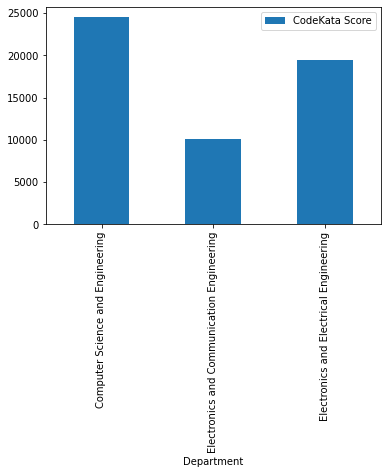

In [55]:
x = data.groupby('Department')['CodeKata Score','Name'].max()
print(x)
x.plot(kind='bar')
#data.plot(kind="bar",x='Department',y='CodeKata Score')

In [50]:
Topper=px.scatter(data,x='Department',y='CodeKata Score',size='CodeKata Score',color='CodeKata Score',hover_data=['Name'],title='Department wise Topper')
Topper